In [4]:
import numpy as np
import pandas as pd
import kernel_descriptors as kd
import paint_auth as pa
import cv2
import matplotlib.pyplot as plt

"""
Tests for kernel mapping approximation
"""
dimension = 500
z = np.random.rand(dimension)
d = np.random.rand(1000,dimension)

norm = np.linalg.norm(d, axis=1)
for i in range(len(d)):
    d[i] = d[i] / norm[i]
    
truth = np.array([kd.gaussian_kernel(d[i],z) for i in range(len(d))])

In [5]:
## D <= d test
dim = [10,50,100]
error = []
for D in dim:
    estimate = []
    for i in range(len(d)):
        estimate.append(np.matmul(kd.rbf_map(d[i], D), kd.rbf_map(d[i], D)))
    estimate = np.array(estimate)
    error.append(np.square((truth-estimate)).mean())

In [6]:
#D > d test
ratio = 6
for i in range(1,ratio):
    estimate = []
    D = dimension * (i + 1)
    for i in range(len(d)):
        estimate.append(np.matmul(kd.rbf_map(d[i], D), kd.rbf_map(d[i], D)))
    estimate = np.array(estimate)
    error.append(np.square((truth-estimate)).mean())

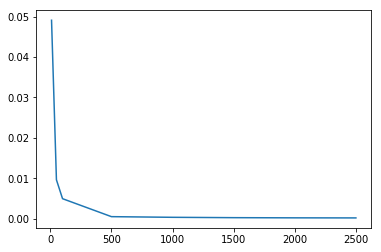

In [7]:
x = [10,50,100,500,1000,1500,2000,2500]
plt.plot(x,error)
plt.title('RBF-Kernel Approx. with Random Orth. Matrix')
plt.xlabel("Di")
plt.show()